# Model Evaluation and Optimization - Project

**Problem Statement 1:**

 
Use a binary classification problem for this purpose.
The dataset chosen for this project is the Breast Cancer Wisconsin dataset.



Tasks to be performed:

1.Import the dataset and read the dataset.  

2.Data cleaning and transformation are done by observing the dataset. Example if needed according to user preference: data['diagnosis'] = data['diagnosis'].map({'malignant': 1, 'benign': 0}) 

3.Split the data into **train – test segment**

4.Plot the distribution of the target variable. 

5.Build a **RandomForest Classifier**

6.Hyperparameter Tuning using **GridSearchCV** 

7.Evaluate the model by the following parameters: **Confusion Matrix** and **Classification Report**

8.Plot **ROC** and **AUC** curve. Identify False Positive Rate' and 'True Positive Rate.

9.Plot Precision-Recall Curve on predicted and test parameters

10.Use **AdaBoost** Classifier

11.Again, check the score utilizing **Gaussian NB** with **AdaBoost** and calculate the score again.

12.Visualize a chart that compares all the **scores** calculated with different techniques.

## Step 1: Import and Load the Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import BaseEstimator, ClassifierMixin


In [2]:
# Load dataset
df = pd.read_csv('data.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])


In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step 2: Data Cleaning and Transformation

In [6]:
# Map diagnosis: M = 1 (malignant), B = 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Step 3: Split the Data

In [7]:

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Plot Target Variable Distribution



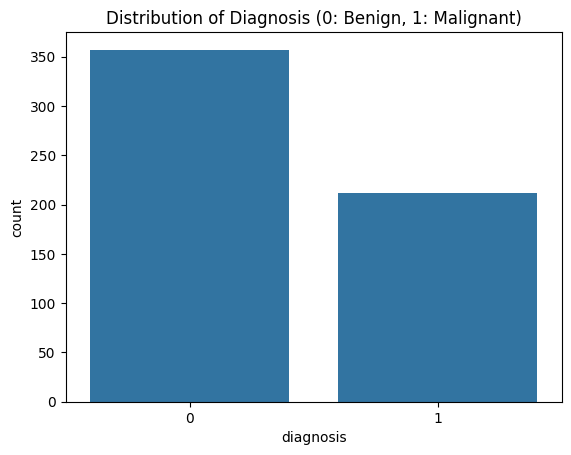

In [8]:
sns.countplot(x=y)
plt.title("Distribution of Diagnosis (0: Benign, 1: Malignant)")
plt.show()

## Step 5: Build Random Forest Classifier



In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Step 6: Hyperparameter Tuning with GridSearchCV


In [10]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_


## Step 7: Evaluate with Confusion Matrix and Classification Report

In [11]:
y_pred = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Step 8: Plot ROC and AUC Curve

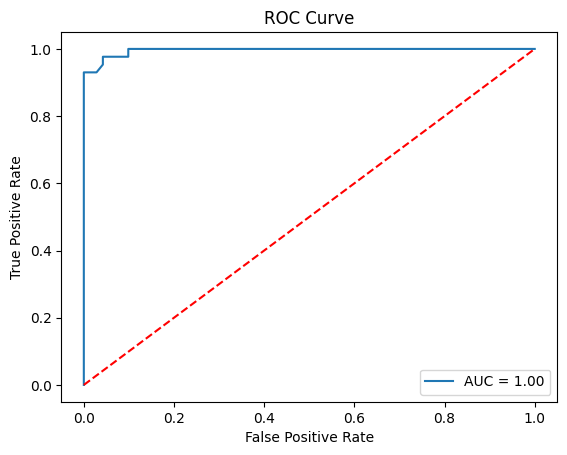

In [12]:
y_prob = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Step 9: Precision-Recall Curve

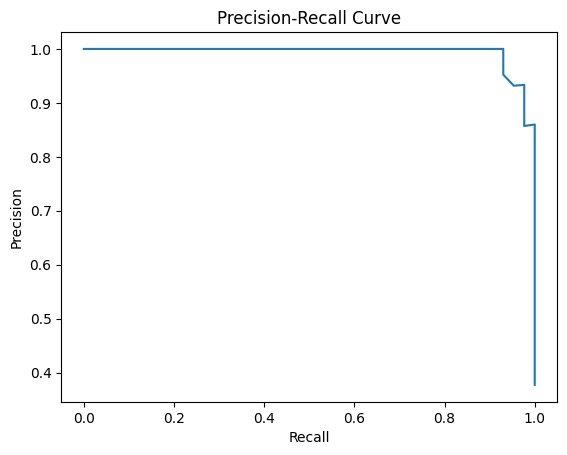

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Step 10: Use AdaBoost Classifier



In [14]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
print("AdaBoost Accuracy:", ada.score(X_test, y_test))

AdaBoost Accuracy: 0.9736842105263158


In [17]:
gnb = GaussianNB()
ada_gnb = AdaBoostClassifier( n_estimators=100, random_state=42)
ada_gnb.fit(X_train, y_train)
ada_gnb_pred = ada_gnb.predict(X_test)

print("AdaBoost Classifier Accuracy:", ada.score(X_test, y_test))
print("AdaBoost with GaussianNB Accuracy:", ada_gnb.score(X_test, y_test))


AdaBoost Classifier Accuracy: 0.9736842105263158
AdaBoost with GaussianNB Accuracy: 0.9736842105263158


## Step 12: Compare Scores


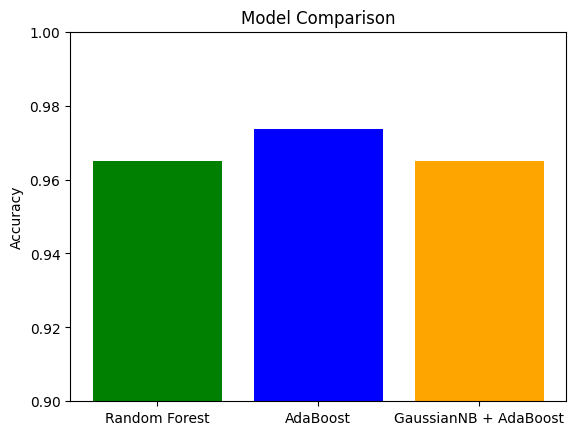

In [22]:
models = {
    "Random Forest": best_rf,
    "AdaBoost": ada,
    "GaussianNB + AdaBoost": nb_ada
}

scores = {name: model.score(X_test, y_test) for name, model in models.items()}
plt.bar(scores.keys(), scores.values(),color=['green', 'blue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0.9, 1.0)
plt.show()


### Conclusion:

In this project, we evaluated and optimized models for a binary classification task using the Breast Cancer dataset.

- The **Random Forest classifier** performed best after hyperparameter tuning using GridSearchCV.
- **ROC and Precision-Recall curves** helped visualize model performance.
- **AdaBoost** and **AdaBoost with GaussianNB** also performed well, though slightly behind the tuned Random Forest.
- A **comparison chart** clearly shows which model performed best.

This project highlights the importance of both model selection and hyperparameter tuning in achieving optimal performance.